<a href="https://colab.research.google.com/github/atanu22-iitk/DLCV/blob/edit/Assignment_dlcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def read_data(file):
  import pickle
  data=open(file, 'rb')
  dict = pickle.load(data, encoding='bytes')
  return dict

def image_array(image_data,x):
    global R_ch,G_ch,B_ch
    R_ch=np.array([image_data[b'data'][x,:32]])
    G_ch=np.array([image_data[b'data'][x,1024:1056]])
    B_ch=np.array([image_data[b'data'][x,2048:2080]])

    for i in range(32,1024,32):
        data_R=np.array(image_data[b'data'][x,i:i+32])
        R_ch=np.append(R_ch, [data_R], axis=0)
        i+=32

    for i in range(1056,2048,32):
        data_G=np.array(image_data[b'data'][x,i:i+32])
        G_ch=np.append(G_ch, [data_G], axis=0)
        i+=32

    for i in range(2080,3072,32):
        data_B=np.array(image_data[b'data'][x,i:i+32])
        B_ch=np.append(B_ch, [data_B], axis=0)
        i+=32

    # print('Red:',R_ch)
    # print('Green:',G_ch)
    # print('Blue:',B_ch)
    # print(type(R_ch))
    
    # print(R_ch.shape)
    # print(G_ch.shape)
    # print(B_ch.shape)
    
    image=np.dstack((R_ch,G_ch,B_ch))

    # print(image)
    # print(image[1,1][2])
    # # print(image.shape)
    # print('Original Image:')
    # plt.imshow(image)
    # plt.show()
    # plt.imshow(R_ch)
    # plt.show()
    # plt.imshow(G_ch)
    # plt.show()
    # plt.imshow(B_ch)
    # plt.show()
    return image

def img_poster(image):
  #range=r,divider=d
  sel_min=5
  sel_max=250
  r = sel_max - sel_min
  d = 255/r
  for i in range(0,32,1):
    for j in range(0,32,1):
      image[i,j][0]=(image[i,j][0]/d) + sel_min
      image[i,j][1]=(image[i,j][1]/d) + sel_min
      image[i,j][2]=(image[i,j][2]/d) + sel_min
  return image

def img_enhance(image):
  for i in range(0,32,1):
    for j in range(0,32,1):
      image[i,j][0]=((image[i,j][0]-R_min_max[0])/(R_min_max[1]-R_min_max[0]))*255
      image[i,j][1]=((image[i,j][1]-G_min_max[0])/(G_min_max[1]-G_min_max[0]))*255
      image[i,j][2]=((image[i,j][2]-B_min_max[0])/(B_min_max[1]-B_min_max[0]))*255

  return image

def min_max(arr):
  min=np.min(arr)
  max=np.max(arr)
  return min, max

def rotate(image):
  # Generate a random angle between 0 and 360
  angle = np.random.uniform(-180, 180)
  k = int(angle / 90)
  # Rotate the array
  rotated_image = np.rot90(image, k )
  # print('Rotating image by '+ str(k) +'times :')
  return rotated_image

def contrast_flipping(image):
  alpha=np.round((np.random.uniform(0.5,2.0)), 2)
  print('Changing contrast of the image by '+ str(alpha) +' factors :')
  for i in range(0,32,1):
    for j in range(0,32,1):
      image[i,j][0]=alpha*(image[i,j][0] - 128) + 128
      image[i,j][1]=alpha*(image[i,j][1] - 128) + 128
      image[i,j][2]=alpha*(image[i,j][2] - 128) + 128
  
  flipped_image=np.flip(image, axis=0)
  return image,flipped_image


def augmentation(image_data):
  Image_aug_1=[]
  Image_1=[]
  for i in range(0,10000,1):
    image = image_array(image_data,i)
    Image_1.append(image)
    sel_function = np.random.randint(1,4)
  #print(sel_function)
    if sel_function==1:
      augmented_image=img_enhance(image)
    elif sel_function==2:
      augmented_image=img_poster(image)
    elif sel_function==3:
      augmented_image=rotate(image)
    else:
      augmented_image=contrast_flipping(image)
    Image_aug_1.append(augmented_image)
    Batch1_aug=np.array(Image_aug_1)
    Batch1_original=np.array(Image_1)
  print(Batch1_aug.shape)
  print(Batch1_original.shape)

  return  Batch1_original, Batch1_aug

def main():
    file_1='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_1'
    image_data_1=read_data(file_1)
    file_2='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_2'
    image_data_2=read_data(file_2)
    file_3='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_3'
    image_data_3=read_data(file_3)
    file_4='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_4'
    image_data_4=read_data(file_4)
    file_5='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_5'
    image_data_5=read_data(file_5)
    print('Showing Data:')
    cnt=0
    for item in image_data_1:
      print('File contain',cnt,' is:', item)
      cnt +=1

    new_image = np.array(image_array(image_data_1,2))
    plt.imshow(new_image)
    plt.show

    # print(image_data_1[b'labels'])
    labels_1 = np.array(image_data_1[b'labels'])
    np.save('labels_1.npy', labels_1)
    labels_2 = np.array(image_data_2[b'labels'])
    np.save('labels_2.npy', labels_2)
    labels_3 = np.array(image_data_3[b'labels'])
    np.save('labels_3.npy', labels_3)
    labels_4 = np.array(image_data_4[b'labels'])
    np.save('labels_4.npy', labels_4)
    labels_5 = np.array(image_data_5[b'labels'])
    np.save('labels_5.npy', labels_5)

    # print(labels_1.shape)
    # print(labels_2.shape)
    # print(labels_3.shape)
    # print(labels_4.shape)
    # print(labels_5.shape)

    # global R_min_max, G_min_max, B_min_max
    # R_min_max=min_max(R_ch)
    # G_min_max=min_max(G_ch)
    # B_min_max=min_max(B_ch)
    # print('Rmin:',R_min_max[0])
    # print('Rmax:',R_min_max[1])
    # print('Gmin:',G_min_max[0])
    # print('Gmax:',G_min_max[1])
    # print('Bmin:',B_min_max[0])
    # print('Bmax:',B_min_max[1])

    Enhanced_image=img_enhance(new_image)
    print('Enhanced Image:')
    plt.imshow(Enhanced_image)
    plt.show()
    print(Enhanced_image[1,1][2])

    Posterize_image=img_poster(new_image)
    print('Posterized Image:')
    plt.imshow(Posterize_image)
    plt.show() 
    print(Posterize_image[1,1][2])

  # Navneet sir enter your code here
    print('Rotated Image:')
    plt.imshow(rotate(new_image))
    plt.show()

    Edited_image = contrast_flipping(new_image) # this will not be reqd after your part
    print('Edited Image:')
    plt.imshow(Edited_image[0])
    plt.show()
  # Navneet sir enter your code here
    print('Flipped Image:')
    plt.imshow(Edited_image[1])
    plt.show()

    # ImageSet_1 = augmentation(image_data_1)
    # np.save('ImageSet_original_1.npy',ImageSet_1[0])
    # np.save('ImageSet_augmented_1.npy',ImageSet_1[1])

    # ImageSet_2 = augmentation(image_data_2)
    # np.save('ImageSet_original_2.npy',ImageSet_2[0])
    # np.save('ImageSet_augmented_2.npy',ImageSet_2[1])

    # ImageSet_3 = augmentation(image_data_3)
    # np.save('ImageSet_original_3.npy',ImageSet_3[0])
    # np.save('ImageSet_augmented_3.npy',ImageSet_3[1])

    # ImageSet_4 = augmentation(image_data_4)
    # np.save('ImageSet_original_4.npy',ImageSet_4[0])
    # np.save('ImageSet_augmented_4.npy',ImageSet_4[1])

    # ImageSet_5 = augmentation(image_data_5)
    # np.save('ImageSet_original_5.npy',ImageSet_5[0])
    # np.save('ImageSet_augmented_5.npy',ImageSet_5[1])

# driver code
if __name__ == "__main__":
    
  # function call
  main()






Showing Data:
File contain 0  is: b'batch_label'
File contain 1  is: b'labels'
File contain 2  is: b'data'
File contain 3  is: b'filenames'
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


Rotation of Image

In [ ]:
import math

def rotate_matrix(matrix, angle):
    # Define the rotation matrix
    rotation_matrix = [[math.cos(angle), -math.sin(angle)],
                       [math.sin(angle), math.cos(angle)]]
    # Transpose the matrix
    transposed_matrix = [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
    # Apply rotation to each pixel
    rotated_matrix = [[0 for j in range(len(matrix))] for i in range(len(matrix[0]))]
    for i in range(len(transposed_matrix)):
        for j in range(len(transposed_matrix[0])):
            rotated_matrix[i][j] = [0, 0, 0]
            for k in range(3):
                rotated_matrix[i][j][k] = transposed_matrix[i][j][0] * rotation_matrix[0][0] + transposed_matrix[i][j][1] * rotation_matrix[0][1]
    # Transpose the matrix back
    result = [[rotated_matrix[j][i] for j in range(len(rotated_matrix))] for i in range(len(rotated_matrix[0]))]
    return result

Flipping of Image

In [ ]:
def flip_image(image):
  rows, cols, _ = image.shape
  result = [[None] * cols for _ in range(rows)]
  for row in range(rows):
    for col in range(cols):
      result[row][cols - col - 1] = image[row][col]
  return result

Random Image Selection

In [ ]:
# def rand_img_sel(image_data):
  
#   x=np.random.randint(1,10000)
#   R_ch_x=np.array([image_data[b'data'][x,:32]])
#   G_ch_x=np.array([image_data[b'data'][x,1024:1056]])
#   B_ch_x=np.array([image_data[b'data'][x,2048:2080]])

#   for i in range(32,1024,32):
#         data_R=np.array(image_data[b'data'][x,i:i+32])
#         R_ch_x=np.append(R_ch, [data_R], axis=0)
#         i+=32

#   for i in range(1056,2048,32):
#         data_G=np.array(image_data[b'data'][x,i:i+32])
#         G_ch_x=np.append(G_ch, [data_G], axis=0)
#         i+=32

#   for i in range(2080,3072,32):
#         data_B=np.array(image_data[b'data'][x,i:i+32])
#         B_ch_x=np.append(B_ch, [data_B], axis=0)
#         i+=32
#   rand_image=np.dstack((R_ch_x,G_ch_x,B_ch_x))
#   return rand_image

Feature Extraction and MLP Implementation

(10000, 32, 32, 3)
['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']
(10000, 320, 32, 3)
<class 'numpy.ndarray'>
6
(100000, 3072)
(100000,)
(10000, 3072)
(10000,)
float32
float32
Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


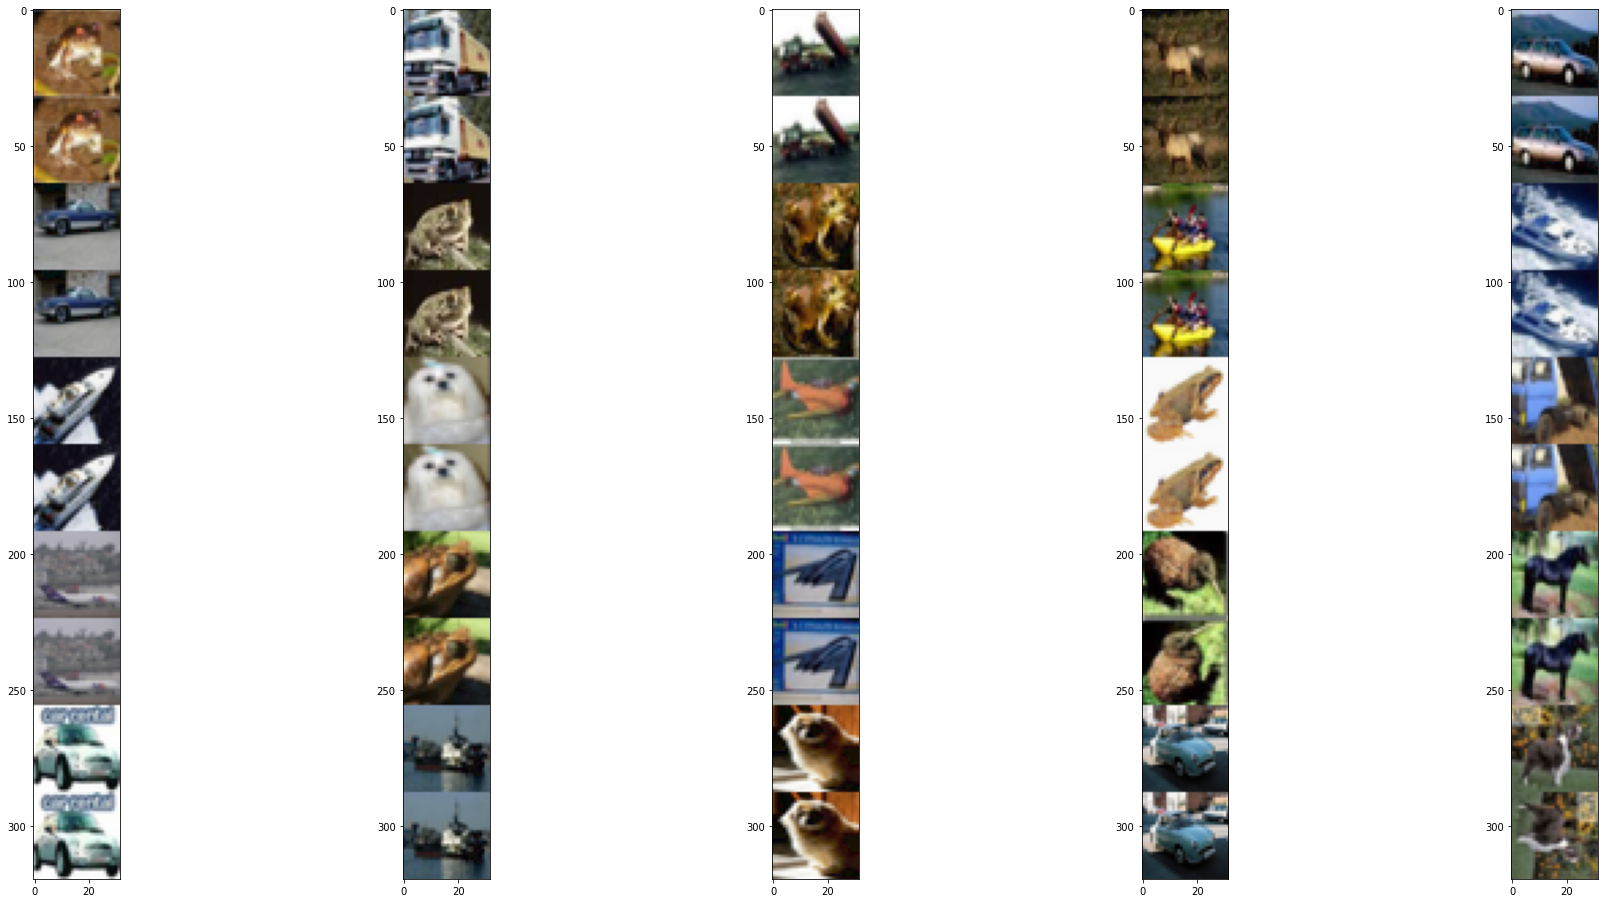

Epoch 1/10
2500/2500 [==============================] - 12s 5ms/step - loss: 2.3055 - accuracy: 0.0974 - val_loss: 2.3031 - val_accuracy: 0.1017
Epoch 2/10
2500/2500 [==============================] - 11s 5ms/step - loss: 2.3033 - accuracy: 0.0999 - val_loss: 2.3035 - val_accuracy: 0.1015
Epoch 3/10
2500/2500 [==============================] - 10s 4ms/step - loss: 2.3034 - accuracy: 0.0997 - val_loss: 2.3036 - val_accuracy: 0.0976
Epoch 4/10
2500/2500 [==============================] - 11s 4ms/step - loss: 2.3032 - accuracy: 0.0992 - val_loss: 2.3041 - val_accuracy: 0.0981
Epoch 5/10
2500/2500 [==============================] - 12s 5ms/step - loss: 2.3033 - accuracy: 0.1004 - val_loss: 2.3035 - val_accuracy: 0.1019
Epoch 6/10
2500/2500 [==============================] - 12s 5ms/step - loss: 2.3031 - accuracy: 0.1018 - val_loss: 2.3039 - val_accuracy: 0.0980
Epoch 7/10
2500/2500 [==============================] - 11s 5ms/step - loss: 2.3028 - accuracy: 0.1025 - val_loss: 2.3045 - val_ac

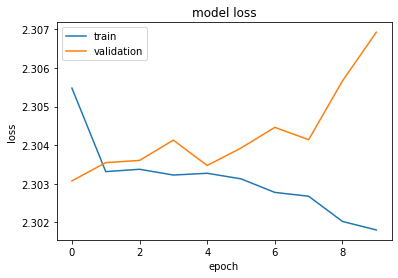

['loss', 'accuracy']
[2.302109479904175, 0.09769999980926514]


In [57]:
from keras.optimizers.optimizer_v2.optimizer_v2 import learning_rate_schedule
import os
import numpy as np
from PIL import Image
import pandas as pd
import torch
import torchvision
import torch.nn as nn
from torchvision import models
from torchvision.models import resnet18
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from matplotlib import pyplot as plt


def read_data(file):
  import pickle
  data=open(file, 'rb')
  dict = pickle.load(data, encoding='bytes')
  return dict



def get_name_to_module(model):
    name_to_module = {}
    for m in model.named_modules():
        name_to_module[m[0]] = m[1]
    return name_to_module


def get_activation(all_outputs, name):
    def hook(model, input, output):
        all_outputs[name] = output.detach()

    return hook


def add_hooks(model, outputs, output_layer_names):
    """
    :param model:
    :param outputs: Outputs from layers specified in `output_layer_names` will be stored in `output` variable
    :param output_layer_names:
    :return:
    """
    name_to_module = get_name_to_module(model)
    for output_layer_name in output_layer_names:
        name_to_module[output_layer_name].register_forward_hook(get_activation(outputs, output_layer_name))


class ModelWrapper(nn.Module):
    def __init__(self, model, output_layer_names, return_single=True):
        super(ModelWrapper, self).__init__()
        
        self.model = model
        self.output_layer_names = output_layer_names
        self.outputs = {}
        self.return_single = return_single
        add_hooks(self.model, self.outputs, self.output_layer_names)

    def forward(self, images):
        self.model(images)
        output_vals = [self.outputs[output_layer_name] for output_layer_name in self.output_layer_names]
        if self.return_single:
            return output_vals[0]
        else:
            return output_vals

class BBResNet18(object):
    def __init__(self):
        self.model = resnet18(pretrained=True)
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.model.eval()

        self.model = ModelWrapper(self.model, ['avgpool'], True)

        self.model.eval()
        self.model.to(self.device)

    def feature_extraction(self, x:np.ndarray):
        '''
            param:
                x: numpy ndarray of shape: [None, 3, 224, 224] and dtype: np.float32
            
            return:
                numpy ndarray (feature vector) of shape: [None, 512] and dtype: np.float32
        '''
        
        x = torch.from_numpy(x).to(self.device)
        
        with torch.no_grad():
            out = self.model(x).cpu().detach()
            out = out.view(out.size(0), -1)
            out = out.numpy()

        return out

    def feature_resize(file):
        X_train = file
        features=[]
        for i in range(len(X_train)//1000):
          batches=[]
          for j in range(1,1001,1):
            img_resized = np.resize(X_train[j-1],(3,224,224))
            batches.append(img_resized)
          print('loop',i)
          batches=np.array(batches)
          batches = batches.astype('float32')
          print(batches.shape)
          print(type(batches))
          Model=BBResNet18()
          feature_extract=Model.feature_extraction(batches)
          features.append(feature_extract)
          print(len(features))
        features=np.array(features)
    
        return features   
    
      
      
      
    
    
  

# class MLP(nn.Module):
    # def __init__(self, input_size, num_classes):
    #     super().__init__()
    #     self.layer1 = nn.Linear(in_features=input_size, out_features=64, bias=True)
    #     self.layer2 = nn.Linear(in_features=64, out_features=64, bias=True)
    #     self.output = nn.Linear(in_features=64, out_features=num_classes, bias=True)
    #     self.relu = nn.ReLU()
        
    # def forward(self, x):
    #     x = self.relu(self.layer1(x))
    #     x = self.relu(self.layer2(x))
    #     x = self.output(x)
    #     return x
    

# class Layer:
#     # ouput = layer.forward(input)
#     # grad_input = layer.backward(input, grad_output)

#     def __init__(self):
#       pass
#     def forward(self, input):
#       return input
#     def backward(self, input, grad_output):
#       num_units = input.shape[1]
#       d_layer_d_input = np.eye(num_units)
#       return np.dot(grad_output, d_layer_d_input)
# class Dense(Layer):
#   def __init__(self, input_units, output_units, learning_rate=0.1):
#       self.learning_rate = learning_rate
#       self.weights = np.random.normal(loc=0.0,
#                         scale = np.sqrt(2/(input_units+output_units)),
#                         size = (input_units,output_units))
#       self.biases = np.zeros(output_units)
        
#   def forward(self,input):
#       return np.dot(input,self.weights) + self.biases

#   def backward(self,input,grad_output):
#       grad_input = np.dot(grad_output, self.weights.T)
#       grad_weights = np.dot(input.T, grad_output)
#       grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
#       assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
#       self.weights = self.weights - self.learning_rate * grad_weights
#       self.biases = self.biases - self.learning_rate * grad_biases
        
#       return grad_input
# class ReLU(Layer):
#   def __init__(self):
#       pass

#   def forward(self, input):
#       relu_forward = np.maximum(0,input)
#       return relu_forward

#   def backward(self, input, grad_output):
#       relu_grad = input > 0
#       return grad_output*relu_grad






def main():
  file_1=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_1.npy')
  file_2=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_1.npy')
  file_3=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_2.npy')
  file_4=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_2.npy')
  file_5=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_3.npy')
  file_6=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_3.npy')
  file_7=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_4.npy')
  file_8=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_4.npy')
  file_9=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_original_5.npy')
  file_10=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/ImageSet_augmented_5.npy')
  labels_1=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_1.npy')
  labels_2=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_2.npy')
  labels_3=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_3.npy')
  labels_4=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_4.npy')
  labels_5=np.load('/content/drive/MyDrive/Colab Notebooks/Augmented Dataset/Labels/labels_5.npy')
  # print(len(file_1))
  print(file_1.shape)
  #feature_set_1 =BBResNet18.feature_resize(file_1)
  # print('Feature vector size:',len(feature_set_1))
  #print('Feature vector shape:',feature_set_1[0,0].shape)
  #image_data=np.load(file_1)
  image_array=file_1[0][0]
  image_array = image_array.astype('float32') 
  classes='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/batches.meta'
  image_data_1=read_data(classes)
  classes_1=image_data_1[b'label_names']
  name=[]
  for i in range(10):
    classes=classes_1[i].decode()
    name.append(classes)
  num_classes=np.array(name)
  print(num_classes)
 

  test_data='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/test_batch'
  image_data_1=read_data(test_data)
  test_data_1 = np.array(image_data_1[b'data'])
  test_labels_1=np.array(image_data_1[b'labels'])
  #print(test_labels_1.shape)
  #print(test_data_1.shape)
  np.save('test_data.npy', test_data_1)

  X_train_1=np.concatenate((file_1, file_2, file_3, file_4, file_5,file_6,file_7,file_8,file_9,file_10), axis=1)
  print(X_train_1.shape)
  X_train=np.reshape(X_train_1,(100000,3072))
  Y_train=np.concatenate((labels_1,labels_1, labels_2,labels_2, labels_3,labels_3, labels_4,labels_4, labels_5,labels_5), axis=None)
  print(type(Y_train))
  print(Y_train[0])
  X_test=test_data_1
  Y_test=test_labels_1
  X_train=X_train.astype('float32')
  X_test=X_test.astype('float32')
  print(X_train.shape)
  print(Y_train.shape)
  print(X_test.shape)
  print(Y_test.shape)
  print(X_test.dtype)
  print(X_train.dtype)
  X_train /=255
  X_test /=255
###########
  print('Example training images and their labels: ' + str([x for x in Y_train[0:5]])) 
  print('Corresponding classes for the labels: ' + str([num_classes[x] for x in Y_train[0:5]]))

  f, axarr = plt.subplots(1, 5)
  f.set_size_inches(32, 16)

  for i in range(5):
    img = X_train_1[i]
    axarr[i].imshow(img)
  plt.show()
############


  Y_train=keras.utils.to_categorical(Y_train,10)
  Y_test=keras.utils.to_categorical(Y_test,10)



  from keras.models import Sequential
  from keras.layers import Dense, Activation
  from keras.optimizers import gradient_descent_v2
  #SGD = gradient_descent_v2.SGD(...)
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=3072))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  sgd = gradient_descent_v2.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

  model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

  history = model.fit(X_train,Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  score = model.evaluate(X_test, Y_test, batch_size=128, verbose=0)
  print(model.metrics_names)
  print(score)

if __name__ == "__main__":
    
  # function call
  main()













